In [18]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [19]:
matplotlib.__version__

'3.5.1'

In [20]:
#file_location

file_location = r'F:\data Immersion\Preparing and Analzing Data\Raw\Advanced Analytics & Dashboard Design(Achievement 6)\Final report'

In [21]:
# Importing housing data

df_aqi = pd.read_csv(os.path.join(file_location, '02 Data', 'ready Data', 'US_AQI_clean.csv'))

In [22]:
df_aqi.head()

,Unnamed: 0,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_name,latitude,longitude,population,density,timezone
0,0,10140,01/01/2022,21,Good,PM2.5,2,Aberdeen,Washington,46.9757,-123.8094,16571,588,America/Los_Angeles
1,1,10140,02/01/2022,12,Good,PM2.5,2,Aberdeen,Washington,46.9757,-123.8094,16571,588,America/Los_Angeles
2,2,10140,03/01/2022,18,Good,PM2.5,2,Aberdeen,Washington,46.9757,-123.8094,16571,588,America/Los_Angeles
3,3,10140,04/01/2022,19,Good,PM2.5,2,Aberdeen,Washington,46.9757,-123.8094,16571,588,America/Los_Angeles
4,4,10140,05/01/2022,17,Good,PM2.5,2,Aberdeen,Washington,46.9757,-123.8094,16571,588,America/Los_Angeles


## Exploring data relation

In [23]:
# creating corelation Matrix by using pandas
df_aqi.corr()

,Unnamed: 0,CBSA Code,AQI,Number of Sites Reporting,latitude,longitude,population,density
Unnamed: 0,1.000000,0.124080,0.015090,0.014654,0.009189,-0.001164,-0.005564,0.003718
CBSA Code,0.124080,1.000000,0.016277,0.017902,-0.036023,-0.042308,0.010413,0.068245
AQI,0.015090,0.016277,1.000000,0.316739,-0.072967,-0.044015,0.199881,0.150845
Number of Sites Reporting,0.014654,0.017902,0.316739,1.000000,-0.070364,-0.080146,0.742656,0.508248
latitude,0.009189,-0.036023,-0.072967,-0.070364,1.000000,-0.187375,-0.080914,0.083767
longitude,-0.001164,-0.042308,-0.044015,-0.080146,-0.187375,1.000000,0.058828,0.091758
population,-0.005564,0.010413,0.199881,0.742656,-0.080914,0.058828,1.000000,0.692767
density,0.003718,0.068245,0.150845,0.508248,0.083767,0.091758,0.692767,1.000000


In [33]:
# Create a subset excluding the CBSA CODE' 'latitude','longtitude','' and "timezone" columns

df_sub = df_aqi[['Date', 'AQI', 'Category', 'Defining Parameter', 'Number of Sites Reporting','city_ascii','state_name','population','density']]

In [44]:
df_sub.corr()

,AQI,Number of Sites Reporting,population,density
AQI,1.000000,0.316739,0.199881,0.150845
Number of Sites Reporting,0.316739,1.000000,0.742656,0.508248
population,0.199881,0.742656,1.000000,0.692767
density,0.150845,0.508248,0.692767,1.000000


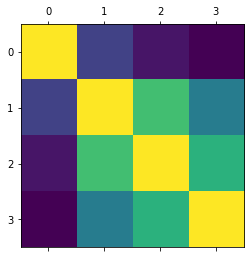

In [45]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_sub.corr())
plt.show()

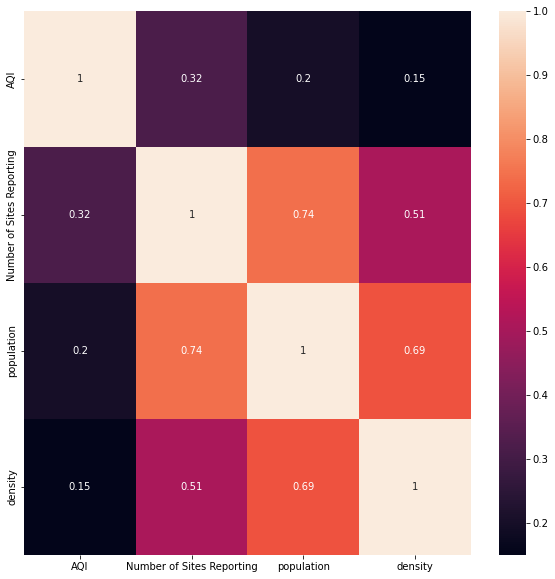

In [53]:
# Creating a subplot w/ matplotlib

f,ax = plt.subplots(figsize=(10,10))

# Creating correlation heatmap in seaborn by applying a heatmap onto the correlation matrix & the subplots defined above
# 'annot' arguments allows plot to place the correlation coefficients onto the map

corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

# Correlations Scatterplots Pair Plots Categorical Plots

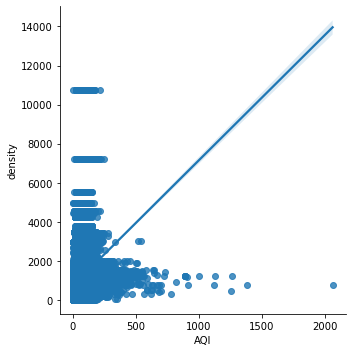

In [54]:
# Create a scatterplot for the 'AQI' and 'density' columns in seaborn

sns.lmplot(x = 'AQI', y = 'density', data = df_aqi)

In [ ]:
# Create a scatterplot for the 'AQI' and 'population' columns in seaborn

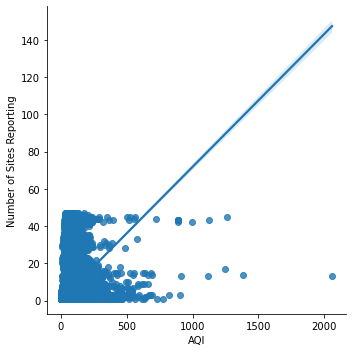

In [56]:
sns.lmplot(x = 'AQI', y = 'Number of Sites Reporting', data = df_aqi)

In [ ]:
# Creating a plot pair

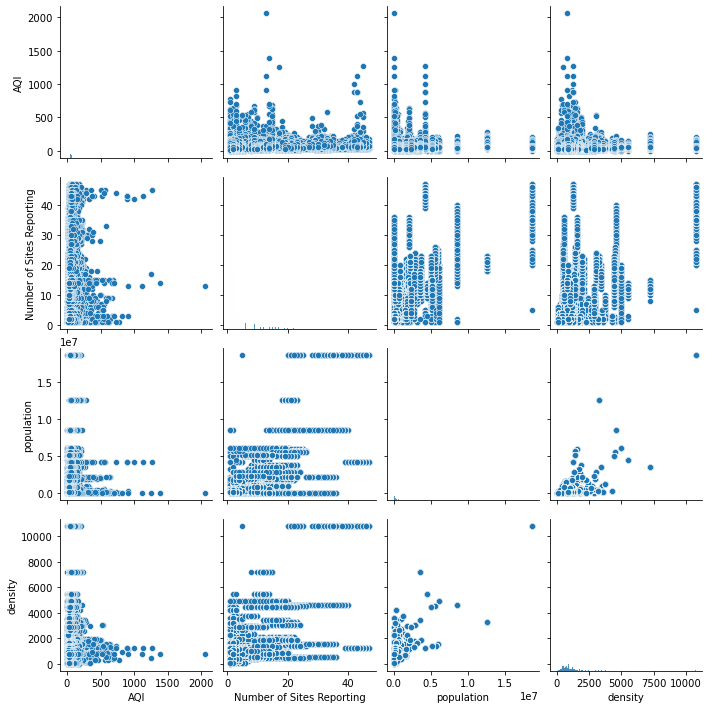

In [57]:
g = sns.pairplot(df_sub)

In [ ]:
# Categorical Plots:

<AxesSubplot:xlabel='density', ylabel='Count'>

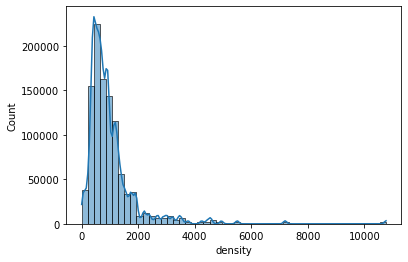

In [65]:
sns.histplot(df_aqi['density'], bins = 50, kde = True)

In [68]:
df_aqi.loc[df_aqi['density'] < 400, 'density_flag'] = 'Low density'

In [80]:
df_aqi.loc[(df_aqi['density'] >= 400) & (df_aqi['density'] <= 776), 'density_flag'] = 'Middle density'


In [77]:
df_aqi.loc[df_aqi['density'] > 776, 'density_flag'] = 'High density'

In [81]:
df_aqi['density_flag'].value_counts(dropna = False)

High density      523499
Middle density    375720
Low density       149356
Name: density_flag, dtype: int64

In [82]:
df_aqi.columns

Index(['Unnamed: 0', 'CBSA Code', 'Date', 'AQI', 'Category',
       'Defining Parameter', 'Number of Sites Reporting', 'city_ascii',
       'state_name', 'latitude', 'longitude', 'population', 'density',
       'timezone', 'density_flag'],
      dtype='object')

In [ ]:
# Create a categorical plot in seaborn using the density_flag created above

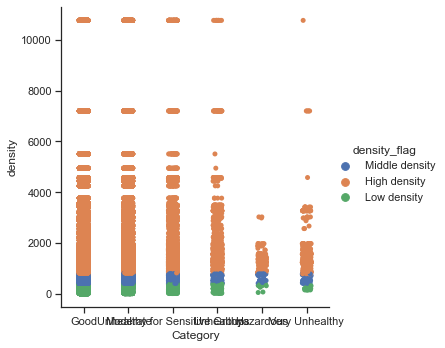

In [98]:
sns.set(style='ticks')
g = sns.catplot(x='Category', y='density', hue='density_flag', data=df_aqi)

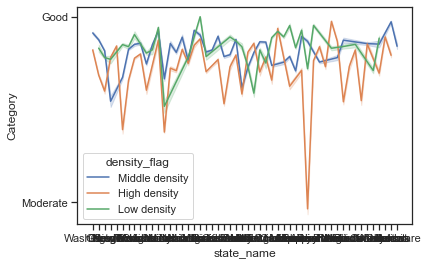

In [91]:
# Creating a line chart state vs category
line = sns.lineplot(data = df_aqi, hue = 'density_flag', x = 'state_name',y = 'Category')

New qustion arise is that ' which part of the Usa have more sensor and how it impact on Air quality index?'

Hypotheses

 : Number of measurement sensors will give accurate results on Air Quality INdex

In [93]:
# Exporting as csv file

df_aqi.to_csv(os.path.join(file_location, '02 Data', 'ready data', 'US_AQI_clean_2.csv'))